# Pre-processing and Training Data Development: 

## Predicting House Prices in North California

![_pre_proc](https://user-images.githubusercontent.com/67468718/111041698-64b57200-83ee-11eb-96ff-b64c11a36c04.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. Removing Outliers](#3_Removing_Outliers)
    * [3.1 Target Variable "price" Visualization](#3.1_Target_Variable_"price"_Visualization)
    * [3.2 Outliers: Standard deviation based detection](#3.2_Outliers:_Standard_deviation_based_detection)
    * [3.3 Outliers: Quantile based detection](#3.3_Outliers:_Quantile_based_detection)
    * [3.4 Visualization all difference datasets](#3.4_Visualization_all_difference_datasets)
    * [3.5 Datasets comparison using statistics summary](#3.5_Datasets_comparison_using_statistics_summary)
    * [3.6 Datasets comparision using Correlation and Applying conditional formatting](#3.6_Datasets_comparision_using_Correlation_and_Applying_conditional_formatting)
 * [4. Features Engineering](#4_Features_Engineering)
    * [4.1 Introducing New Features](#4.1_Introducing_New_Features)
    * [4.2 Unsupervised Machine Learning - Clustering using K-Means](#4.2_Unsupervised_Machine_Learning_-_Clustering_using_K-Means)
    * [4.3 Calculating Distance between houses and Schools Using Haversine formula](#4.3_Calculating_Distance_between_houses_and_Schools_Using_Haversine_formula) 
    * [4.4 Dropping and encoding Features](#4.4_Dropping_and_encoding_Features)
    * [4.5 Final DataFrame Summary](#4.5_Final_DataFrame_Summary)
    * [4.6 Final Visualization of our Target Variable 'price'](#4.6_Final_Visualization_of_our_Target_Variable_price)
 * [5. Features Selection: Define/Select Features](#5_Features_Selection:_Define/Select_Features)
 * [6. Train/Test Split](#6_Train/Test_Split)
 * [7. Scaling and Transformation: Standardization](#7_Scaling_and_Transformation:_Standardization)
 * [8. Modeling](#8_Modeling)
     * [8.1 Dummy Regression](#8.1_Dummy_Regression)
      * [8.1.1 Fitting Dummy Regression](#8.1.1_Fitting_Dummy_Regression)
      * [8.1.2 Dummy Regression Model Evaluation](#8.1.2_Dummy_Regression_Model_Evaluation)       
     * [8.2 Linear Regression](#8.2_Linear_Regression)
      * [8.2.1 Fitting Linear Regression](#8.2.1_Fitting_Linear_Regression)
      * [8.2.2 Linear Regression: intercept & Coefficients](#8.2.2_Linear_Regression:_intercept_&_Coefficients)
      * [8.2.3 Linear Regression: Residuals Visualization](#8.2.3_Linear_Regression:_Residuals_Visualization)
      * [8.3.4 Linear Regression Model Evaluation](#8.2.4_Linear_Regression_Model_Evaluation)
    * [8.2 Models next step](#8.2_Models_next_step)
 * [9. Saving our data](#9_Saving_our_data)

## 1. Introduction<a id='1_Introduction'></a>

The pre-processing and Training data is considered as the final step for data manipulation, where we can make sure that: 

 * No Outliers
 * No missing data
 * Features Engineering: 
   * Engineer New Features
   * Drop Features
   * Change features structure
   * Encode Features
   * Train and test split the data set



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/EDA/Datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [7]:
# List files/folders in the cd:
os.listdir()

['df.csv', 'price_1.csv', 'price_2.csv', 'price_3.csv']

In [8]:
filenames = ['df.csv', 'price_1.csv', 'price_2.csv', 'price_3.csv']

dataframes =[]

for f in filenames:
    dataframes.append(pd.read_csv(f, encoding='ISO-8859-1'))

In [9]:
#let's rename the dataframes according to the above filenames list:
df = dataframes[0]
price_1 = dataframes[1]
price_2 = dataframes[2]
price_3 = dataframes[3]


## 3. Removing Outliers<a id='3_Removing_Outliers'></a>

Outliers are data points that exist far away from the majority of your data. This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way you will often want to remove these values as they can negatively impact your models. An example of the negative effect can be seen here where an outlier is causing almost all of the scaled data to be squashed to the lower bound.


### 3.1 Target Variable "price" Visualization with Outliers boundaries using Quantile and Standrad Deviation<a id='3.1_Target_Variable_"price"_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


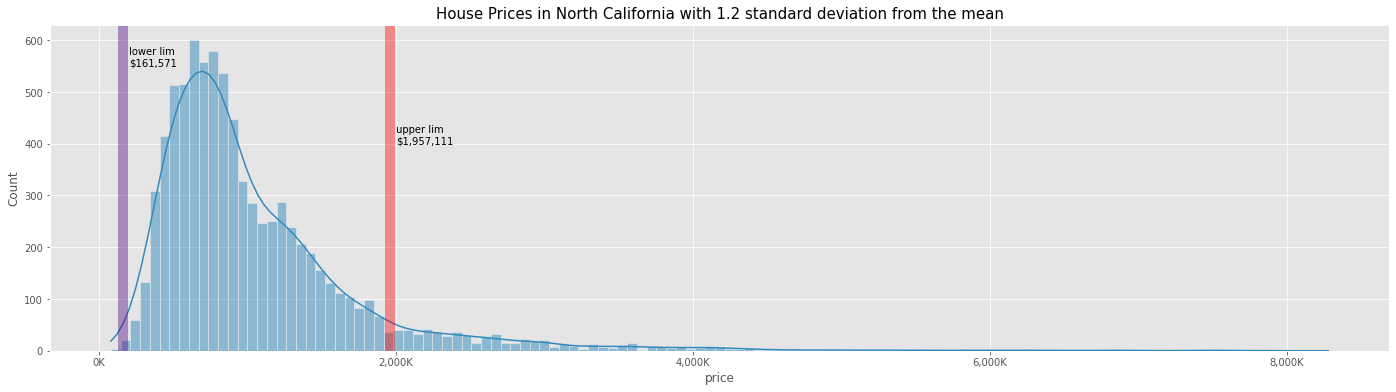

In [10]:
# Making a histogram of the price variable and adding Standard deviation based detection"
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)

# let's choose 1.2 standard deviation from the mean:
factor = 1.2

# let's define upper:
upper_lim = df['price'].mean () + df['price'].std () * factor

# let's define lower:
lower_lim = df['price'].mean () - df['price'].std () * factor

#Plot upper and lower based on 1.2 standard deviation from the mean:
ax.axvline(upper_lim, color='red', ls='-', alpha=0.4, lw=10)
ax.axvline(lower_lim, color='indigo', ls='-', alpha=0.4, lw=10)
ax.set_title('House Prices in North California with 1.2 standard deviation from the mean', fontsize=15)
plt.annotate('upper lim \n$1,957,111', xy=(1957111, 400), xytext=(2000000, 400), fontsize=10)
plt.annotate('lower lim \n$161,571', xy=(161571, 550), xytext=(200000, 550), fontsize=10)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


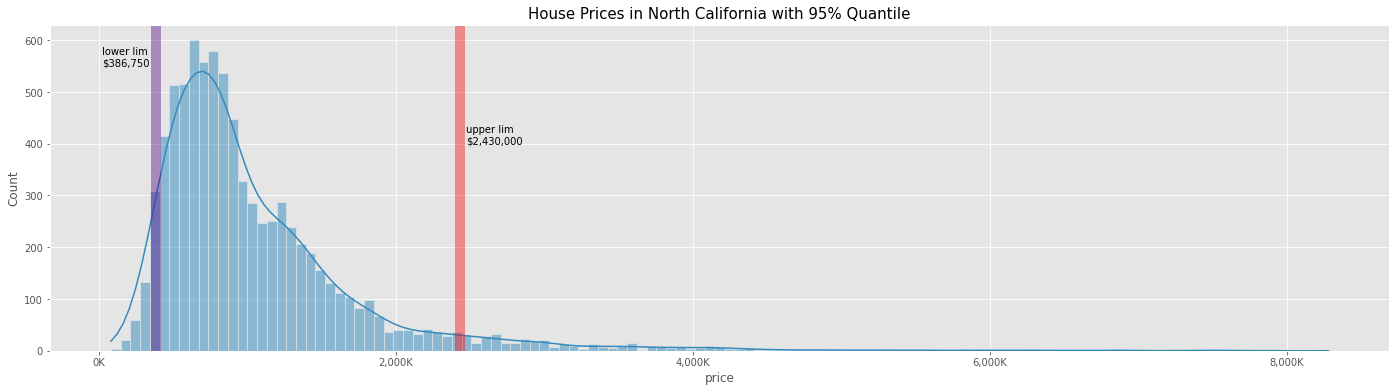

In [11]:
# Making a histogram of the price variable and Quantile based detection
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
# let's define upper using 95th quantile:
upper_lim = df['price'].quantile(0.95)

# let's define upper using 95th quantile:
lower_lim = df['price'].quantile(0.05)

#Plot upper and lower based on 5th, 95th quantile:
ax.axvline(upper_lim, color='red', ls='-', alpha=0.4, lw=10)
ax.axvline(lower_lim, color='indigo', ls='-', alpha=0.4, lw=10)
plt.annotate('upper lim \n$2,430,000', xy=(2430000, 400), xytext=(2470000, 400), fontsize=10)
plt.annotate('lower lim \n$386,750', xy=(20000, 550), xytext=(20000, 550), fontsize=10)
ax.set_title('House Prices in North California with 95% Quantile', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

### 3.2 Outliers: Standard deviation based detection<a id='3.2_Outliers:_Standard_deviation_based_detection'></a>

In [12]:
factor = 1.2
upper_lim = df['price'].mean () + df['price'].std () * factor
lower_lim = df['price'].mean () - df['price'].std () * factor

df_std = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

### 3.3 Outliers: Quantile based detection<a id='3.3_Outliers:_Quantile_based_detection'></a>

In [13]:

upper_lim = df['price'].quantile(0.95)
lower_lim = df['price'].quantile(0.05)

df_quant = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

### 3.4 Visualization all difference datasets based on multiple outliers method: Target Variable "price" Visualization using different datasets<a id='3.4_Visualization_all_difference_datasets'></a>

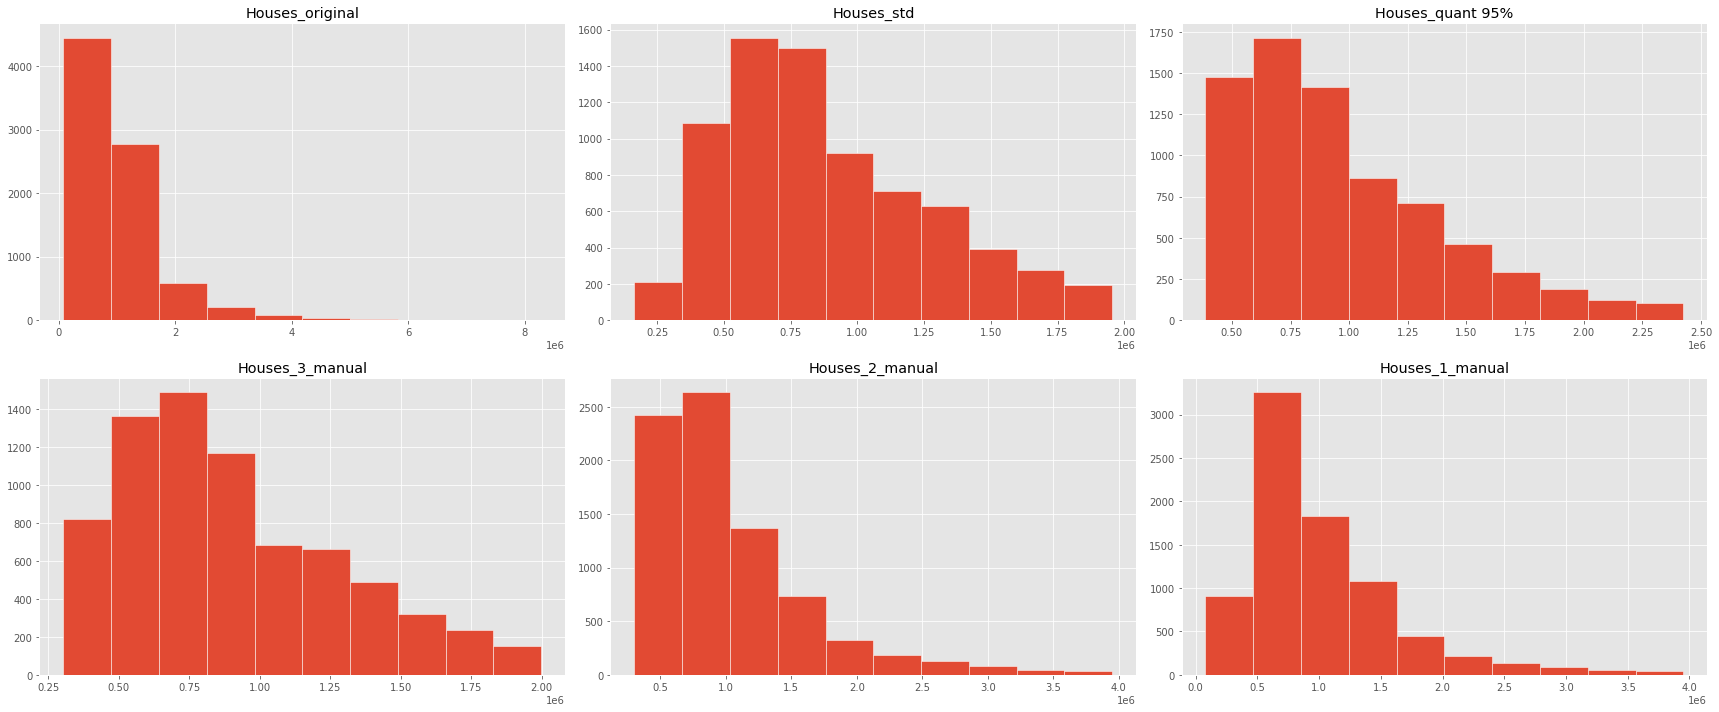

In [14]:
plt.subplots(figsize = (24,10))
plt.subplot(2,3,1)
plt.hist(df[['price']], edgecolor='white') # df is our original dataset where it has the outliers (EDA step output - house prices between $80K-$8M)
plt.title('Houses_original')
plt.subplot(2,3,2)
plt.hist(df_std[['price']], edgecolor='white') # df_std is the data where the outliers were elimitaed using 1.2 standard deviation of the mean
plt.title('Houses_std')
plt.subplot(2,3,3)
plt.hist(df_quant[['price']], edgecolor='white') # df_quant is the data where the outliers were elimitaed using 95th Quantile
plt.title('Houses_quant 95%')
plt.subplot(2,3,4)
plt.hist(price_3[['price']], edgecolor='white') # price_3 is the data where the outliers were elimitaed by keeping house prices between $300K-$2M
plt.title('Houses_3_manual')
plt.subplot(2,3,5)
plt.hist(price_2[['price']], edgecolor='white') # price_2 is the data where the outliers were elimitaed by keeping house prices between $300K-$4M
plt.title('Houses_2_manual')
plt.subplot(2,3,6)
plt.hist(price_1[['price']], edgecolor='white') # price_1 is the data where the outliers were elimitaed by keeping house prices between $80K-$4M
plt.title('Houses_1_manual')
plt.tight_layout()
plt.show()


### 3.5 Datasets comparison using statistics summary:<a id='3.5_Datasets_comparison_using_statistics_summary'></a>

Target Variable "price" Statistics Summary using different datasets

In [15]:
#let's define below pandas series using .describe() method on target variable 'price':
df_main = df['price'].describe()
std_df = df_std['price'].describe()
quant_df = df_quant['price'].describe()
man_price_1 = price_1['price'].describe()
man_price_2 = price_2['price'].describe()
man_price_3 = price_3['price'].describe()

#Let's concatenate all above pandas Series:
df_stat = pd.concat([df_main, std_df, quant_df, man_price_1, man_price_2, man_price_3], axis = 1) 

#let's define top row of the new df df_stat:
columns = ['df_main', 'std_df', 'quant_df', 'man_price_1', 'man_price_2', 'man_price_3'] 
df_stat.loc[len(df_stat.index)] = columns

#Add columns as top row:
header_row = 8
df_stat.columns = df_stat.iloc[header_row]

# Let's drop added row "columns":
df_stat = df_stat.drop(df_stat.index[8])

#Now let's delete the name of the column
df_stat.columns.name = None

df_stat

df_main     std_df     quant_df  man_price_1  man_price_2  \
count         8171       7484         7352         8081         7964   
mean   1.05934e+06     887769       966399  1.01363e+06   1.0249e+06   
std         748142     387091       437422       600975       598064   
min          80000     165000       387000        80000       303482   
25%         610000     590000       635000       610000       620000   
50%         847000     808000       847000       840000       850000   
75%      1.275e+06   1.15e+06  1.21625e+06    1.255e+06  1.26262e+06   
max       8.28e+06  1.955e+06    2.425e+06     3.95e+06     3.95e+06   

       man_price_3  
count         7396  
mean        900685  
std         386134  
min         303482  
25%         603248  
50%         815000  
75%      1.155e+06  
max    1.99889e+06

##### According to the above table, std_df is showig the best, mean, std by eliminating all data greater than 1.2 standard deviation from the mean and at the same we managed only to lose 687 outliers.

### 3.6 Datasets comparision using Correlation and Applying conditional formatting :<a id='3.6_Datasets_comparision_using_Correlation_and_Applying_conditional_formatting'></a>

Target Variable "price" Correlations using different datasets

In [16]:
# Now, let's find correlation to see if our above choice (std_df) is showing the highest correlation:
df_main_corr = df.corr()['price']
std_df_corr = df_std.corr()['price']
quant_df_corr = df_quant.corr()['price']
man_price_1_corr = price_1.corr()['price']
man_price_2_corr = price_2.corr()['price']
man_price_3_corr = price_3.corr()['price']

#Let's concatenate all above pandas Series:
df_stat_corr = pd.concat([df_main_corr, std_df_corr, quant_df_corr, man_price_1_corr, man_price_2_corr, man_price_3_corr], axis = 1) 

#let's define top row of the new df df_stat:
columns = ['df_main_corr', 'std_df_corr', 'quant_df_corr', 'man_price_1_corr', 'man_price_2_corr', 'man_price_3_corr'] 
df_stat_corr.loc[len(df_stat_corr.index)] = columns
df_stat_corr
#Add columns as top row:
header_row = 21
df_stat_corr.columns = df_stat_corr.iloc[header_row]

# Let's drop added row "columns":
df_stat_corr = df_stat_corr.drop(df_stat_corr.index[21])

# Let's drop price for better visibility:
df_stat_corr = df_stat_corr.drop(df_stat_corr.index[1])

#Now let's delete the name of the column
df_stat_corr.columns.name = None

##### Applying conditional formatting and correlation() function with respect to Target Variable "price" using different datasets

In [17]:
def correlation(val):
    """
    Takes a scalar and returns a string with
    the css property "color: green, blue and red" 
    """
    if val < 0: 
        color = 'red'
    elif val > 0.4:
        color = 'green'
    else:
        color = 'blue'
    return 'color: %s' % color

In [18]:
# let's apply conditional formatting using df.style and correlation() function:
Corr_Compare = df_stat_corr.style.applymap(correlation)
Corr_Compare

##### According to the above datasets, std_df is again showig the best correlation between our target variable (price) and all other features when we compare all datasets.

##### Then, let's choose std_df to be our final dataset

Now, Let's check number of Houses per zipcode, let's keep only zipcodes with the highest numbers of houses to improve predictions.

In [19]:
house_count_zip = df_std.groupby('zipcode')['price'].count().reset_index()

house_count_zip.sort_values(by='price', ascending=True)


zipcode  price
6     94087      1
2     94028      2
46    94586      2
16    94513      2
87    95129      3
..      ...    ...
44    94582    252
22    94523    369
35    94553    408
37    94565    430
39    94568    469

[88 rows x 2 columns]

As we can see above, looks like we have some zipcodes with very low number of houses so let's only keep zipcodes if they have 81 or more houses per zipcode

In [20]:
house_count_zip = house_count_zip[house_count_zip['price']>=81]
house_count_zip.sort_values(by='price', ascending=True)

zipcode  price
19    94519     81
29    94545     81
18    94518     99
76    94801    105
51    94597    119
49    94595    119
78    94804    121
81    95050    126
41    94578    130
28    94544    134
14    94507    138
13    94506    140
48    94588    145
52    94598    145
26    94541    147
40    94577    176
21    94521    178
25    94531    189
33    94551    193
45    94583    195
82    95051    201
38    94566    211
23    94526    212
30    94546    214
32    94550    235
15    94509    245
44    94582    252
22    94523    369
35    94553    408
37    94565    430
39    94568    469

In [21]:
house_count_zip = house_count_zip[['zipcode']]
house_count_zip

zipcode
13    94506
14    94507
15    94509
18    94518
19    94519
21    94521
22    94523
23    94526
25    94531
26    94541
28    94544
29    94545
30    94546
32    94550
33    94551
35    94553
37    94565
38    94566
39    94568
40    94577
41    94578
44    94582
45    94583
48    94588
49    94595
51    94597
52    94598
76    94801
78    94804
81    95050
82    95051

In [22]:
#Now let's merge house_count_zip with our final df_final_v1:

df_std = pd.merge(df_std, house_count_zip, how='inner', on='zipcode')
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6007 entries, 0 to 6006
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           6007 non-null   object 
 1   property_type     6007 non-null   object 
 2   zipcode           6007 non-null   int64  
 3   price             6007 non-null   int64  
 4   beds              6007 non-null   int64  
 5   baths             6007 non-null   int64  
 6   sqft              6007 non-null   int64  
 7   lot_size          6007 non-null   int64  
 8   days_on_market    6007 non-null   int64  
 9   price_per_sqft    6007 non-null   int64  
 10  hoa_month         6007 non-null   float64
 11  lat               6007 non-null   float64
 12  long              6007 non-null   float64
 13  property_age      6007 non-null   int64  
 14  school_rating     6007 non-null   int64  
 15  school_count      6007 non-null   int64  
 16  bart_count        6007 non-null   int64  


In [23]:
px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_std, lat='lat', 
                        lon='long', color="school_rating",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'Visualizing House sales per School Rating')

fig.show()

**Finally, let's drop the all these four nodes which are in rural areas:**

 1. 37.5302354	-121.5431811
 2. 37.59752	-121.643953
 3. 37.7752879	-121.8172896
 4. 37.949661	-122.204104



In [24]:
df_std.head()

address              property_type  zipcode  \
0   6985 calistoga ln, dublin, ca 94568                Condo/Co-op    94568   
1      4273 trolan ln, dublin, ca 94568  Single Family Residential    94568   
2  7370 yountville st, dublin, ca 94568  Single Family Residential    94568   
3  4075 st helena way, dublin, ca 94568  Single Family Residential    94568   
4     10885 mcpeak ln, dublin, ca 94568                  Townhouse    94568   

     price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  ...  \
0   905000     3      4  1994         0              80             454  ...   
1  1250000     4      4  3083      3058             143             405  ...   
2  1290000     4      4  3180      4477             123             406  ...   
3  1105000     4      2  2069      2851              21             534  ...   
4   725000     3      2  1387      5806              51             523  ...   

   property_age  school_rating  school_count  bart_count  median_income  \
0             3              8            11           1         119637   
1             4              8            11           1         119637   
2             3              8            11           1         119637   
3             3              8            11           1         119637   
4            24              8            11           1         119637   

   hotness_score  supply_score  demand_score  malls_count  university_count  
0          83.72         94.25         73.19            0                 0  
1          83.72         94.25         73.19            0                 0  
2          83.72         94.25         73.19            0                 0  
3          83.72         94.25         73.19            0                 0  
4          83.72         94.25         73.19            0                 0  

[5 rows x 23 columns]

In [25]:
df_std[df_std.long.isin([-121.5431811, -121.643953, -121.8172896, -122.204104])]

address              property_type  \
3089  1905 marciel rd, livermore, ca 94551  Single Family Residential   
3293   19100 mines rd, livermore, ca 94550  Single Family Residential   
3298   11745 mines rd, livermore, ca 94550  Single Family Residential   
3625    105 hampton rd, martinez, ca 94553  Single Family Residential   

      zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
3089    94551  1795000     2      2  1530      5760              31   
3293    94550   794126     4      2  2100         0              64   
3298    94550  1375000     5      2  2712      5760              15   
3625    94553  1625000     6      4  3670      5760              81   

      price_per_sqft  ...  property_age  school_rating  school_count  \
3089            1173  ...            10              6             8   
3293               1  ...            39              7            11   
3298             507  ...            30              7            11   
3625             443  ...            38              6             9   

      bart_count  median_income  hotness_score  supply_score  demand_score  \
3089           0         103532          91.91         89.41         94.41   
3293           0         108408          91.62         86.60         96.65   
3298           0         108408          91.62         86.60         96.65   
3625           0          80732          94.02         92.13         95.91   

      malls_count  university_count  
3089            1                 0  
3293            1                 0  
3298            1                 0  
3625            0                 0  

[4 rows x 23 columns]

In [26]:
# So now let's drop them:
df_std = df_std[~df_std.long.isin([-121.5431811, -121.643953, -121.8172896, -122.204104])]

In [27]:
# Now, let's confirm:
df_std[df_std.long.isin([-121.5431811, -121.643953, -121.8172896, -122.204104])]

Empty DataFrame
Columns: [address, property_type, zipcode, price, beds, baths, sqft, lot_size, days_on_market, price_per_sqft, hoa_month, lat, long, property_age, school_rating, school_count, bart_count, median_income, hotness_score, supply_score, demand_score, malls_count, university_count]
Index: []

[0 rows x 23 columns]

In [28]:
df_std[df_std.sqft.isin([9999])]

address              property_type  zipcode  \
1964  412 veda dr, danville, ca 94526  Single Family Residential    94526   

        price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  \
1964  1410000     3      1  9999     10000              73             141   

      ...  property_age  school_rating  school_count  bart_count  \
1964  ...            69              9            10           0   

      median_income  hotness_score  supply_score  demand_score  malls_count  \
1964         135628          93.01         92.71         93.32            1   

      university_count  
1964                 0  

[1 rows x 23 columns]

As shown, above. This doesn't have accurate features details so let's drop it.

In [29]:
#let's drop it:
df_std = df_std[~df_std.sqft.isin([9999])]

In [30]:
#let's confirm:
df_std[df_std.sqft.isin([9999])]

Empty DataFrame
Columns: [address, property_type, zipcode, price, beds, baths, sqft, lot_size, days_on_market, price_per_sqft, hoa_month, lat, long, property_age, school_rating, school_count, bart_count, median_income, hotness_score, supply_score, demand_score, malls_count, university_count]
Index: []

[0 rows x 23 columns]

In [31]:
df_std.shape

(6002, 23)

In [32]:

px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_std, lat='lat', 
                        lon='long', color="price",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'Visualizing House Prices')

fig.show()

In [33]:
px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_std, lat='lat', 
                        lon='long', color="median_income",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'Visualizing House sales per Median Income')

fig.show()

In [34]:
px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_std, lat='lat', 
                        lon='long', color="school_rating",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'Visualizing House sales per School Rating')

fig.show()

In [35]:
#let's name our final df: df_final
df_final = df_std

# let's get the shape of df_final:
df_final.shape

(6002, 23)

In [36]:
# let's view the structure of df_final: 
pd.options.display.max_columns = None
df_final.head()

address              property_type  zipcode  \
0   6985 calistoga ln, dublin, ca 94568                Condo/Co-op    94568   
1      4273 trolan ln, dublin, ca 94568  Single Family Residential    94568   
2  7370 yountville st, dublin, ca 94568  Single Family Residential    94568   
3  4075 st helena way, dublin, ca 94568  Single Family Residential    94568   
4     10885 mcpeak ln, dublin, ca 94568                  Townhouse    94568   

     price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  \
0   905000     3      4  1994         0              80             454   
1  1250000     4      4  3083      3058             143             405   
2  1290000     4      4  3180      4477             123             406   
3  1105000     4      2  2069      2851              21             534   
4   725000     3      2  1387      5806              51             523   

   hoa_month        lat        long  property_age  school_rating  \
0      388.0  37.733978 -121.872736             3              8   
1      232.0  37.737748 -121.876525             4              8   
2      232.0  37.737013 -121.877507             3              8   
3      237.0  37.736513 -121.873423             3              8   
4      325.0  37.699680 -121.956865            24              8   

   school_count  bart_count  median_income  hotness_score  supply_score  \
0            11           1         119637          83.72         94.25   
1            11           1         119637          83.72         94.25   
2            11           1         119637          83.72         94.25   
3            11           1         119637          83.72         94.25   
4            11           1         119637          83.72         94.25   

   demand_score  malls_count  university_count  
0         73.19            0                 0  
1         73.19            0                 0  
2         73.19            0                 0  
3         73.19            0                 0  
4         73.19            0                 0

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6002 entries, 0 to 6006
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           6002 non-null   object 
 1   property_type     6002 non-null   object 
 2   zipcode           6002 non-null   int64  
 3   price             6002 non-null   int64  
 4   beds              6002 non-null   int64  
 5   baths             6002 non-null   int64  
 6   sqft              6002 non-null   int64  
 7   lot_size          6002 non-null   int64  
 8   days_on_market    6002 non-null   int64  
 9   price_per_sqft    6002 non-null   int64  
 10  hoa_month         6002 non-null   float64
 11  lat               6002 non-null   float64
 12  long              6002 non-null   float64
 13  property_age      6002 non-null   int64  
 14  school_rating     6002 non-null   int64  
 15  school_count      6002 non-null   int64  
 16  bart_count        6002 non-null   int64  


## 4. Features Engineering<a id='4_Features_Engineering'></a>

### 4.1 Introducing New Features<a id='4.1_Introducing_New_Features'></a>
1. Let's create New 3 categorical  features (boolean variables): 
 * barts: 1 yes barts and 0 no barts 
 * malls: 1 yes malls and 0 no malls
 * universities: 1 yes universities and 0 no Universities 
2. Beds_Baths_tradeoff (bedBath) = beds * baths
3. AvgRoomSize = sqft / (beds + baths)


#### barts

<AxesSubplot:ylabel='Frequency'>

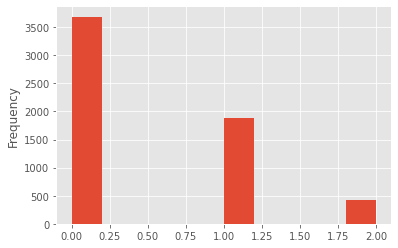

In [38]:
df_final['bart_count'].plot(kind='hist')

In [39]:

df_final['barts'] = [0 if x ==0 else 1 for x in df_final['bart_count']] 


<AxesSubplot:ylabel='Frequency'>

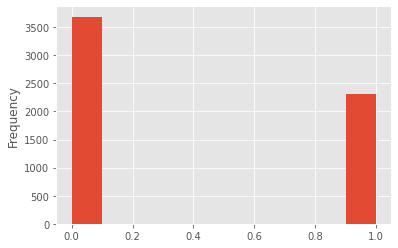

In [40]:
df_final['barts'].plot(kind='hist')

#### malls

<AxesSubplot:ylabel='Frequency'>

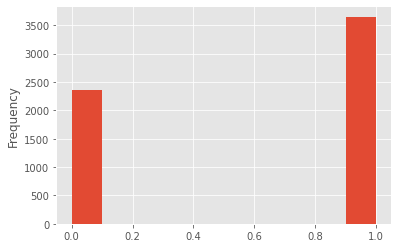

In [41]:
df_final['malls_count'].plot(kind='hist')

In [42]:
df_final['malls'] = [0 if x ==0 else 1 for x in df_final['malls_count']] 

<AxesSubplot:ylabel='Frequency'>

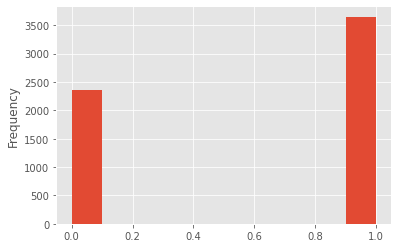

In [43]:
df_final['malls'].plot(kind='hist')

#### universities

<AxesSubplot:ylabel='Frequency'>

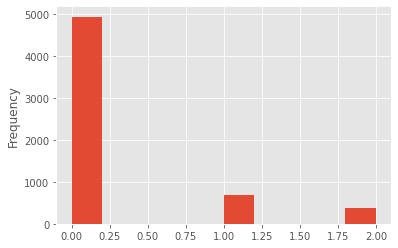

In [44]:
df_final['university_count'].plot(kind='hist')

In [45]:
df_final['universities'] = [0 if x ==0 else 1 for x in df_final['university_count']]

<AxesSubplot:ylabel='Frequency'>

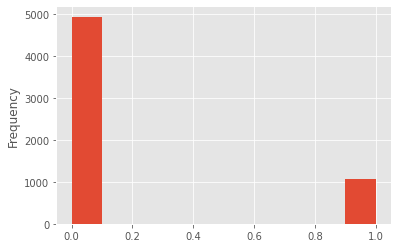

In [46]:
df_final['universities'].plot(kind='hist')

#### bedBath

In [47]:
df_final['bedBath'] = df_final['beds'] * df_final['baths']

<AxesSubplot:ylabel='Frequency'>

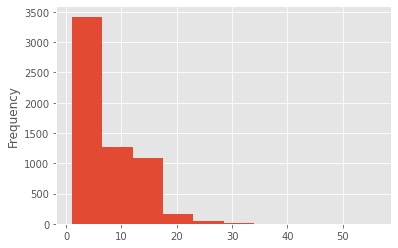

In [48]:
df_final['bedBath'].plot(kind='hist')

#### AvgRoomSize

In [49]:
df_final['AvgRoomSize'] = df_final.sqft/ (df_final.beds + df_final.baths)


In [50]:
df_final['AvgRoomSize'] = round(df_final['AvgRoomSize'], 3)

<AxesSubplot:ylabel='Frequency'>

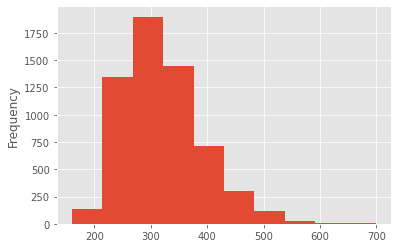

In [51]:
df_final['AvgRoomSize'].plot(kind='hist')

Now let's look at final_df

In [52]:
df_final.head()

address              property_type  zipcode  \
0   6985 calistoga ln, dublin, ca 94568                Condo/Co-op    94568   
1      4273 trolan ln, dublin, ca 94568  Single Family Residential    94568   
2  7370 yountville st, dublin, ca 94568  Single Family Residential    94568   
3  4075 st helena way, dublin, ca 94568  Single Family Residential    94568   
4     10885 mcpeak ln, dublin, ca 94568                  Townhouse    94568   

     price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  \
0   905000     3      4  1994         0              80             454   
1  1250000     4      4  3083      3058             143             405   
2  1290000     4      4  3180      4477             123             406   
3  1105000     4      2  2069      2851              21             534   
4   725000     3      2  1387      5806              51             523   

   hoa_month        lat        long  property_age  school_rating  \
0      388.0  37.733978 -121.872736             3              8   
1      232.0  37.737748 -121.876525             4              8   
2      232.0  37.737013 -121.877507             3              8   
3      237.0  37.736513 -121.873423             3              8   
4      325.0  37.699680 -121.956865            24              8   

   school_count  bart_count  median_income  hotness_score  supply_score  \
0            11           1         119637          83.72         94.25   
1            11           1         119637          83.72         94.25   
2            11           1         119637          83.72         94.25   
3            11           1         119637          83.72         94.25   
4            11           1         119637          83.72         94.25   

   demand_score  malls_count  university_count  barts  malls  universities  \
0         73.19            0                 0      1      0             0   
1         73.19            0                 0      1      0             0   
2         73.19            0                 0      1      0             0   
3         73.19            0                 0      1      0             0   
4         73.19            0                 0      1      0             0   

   bedBath  AvgRoomSize  
0       12      284.857  
1       16      385.375  
2       16      397.500  
3        8      344.833  
4        6      277.400

### 4.2 Unsupervised Machine Learning - Clustering using K-Means<a id='4.2_Unsupervised_Machine_Learning_-_Clustering_using_K-Means'></a>

Now let's Unsupervised Learning - Clustering using K-Means to create a new feature which is close to a neighborhood (less than a zipcode).

In [53]:
df_final. columns

Index(['address', 'property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count', 'bart_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'malls_count', 'university_count', 'barts', 'malls', 'universities',
       'bedBath', 'AvgRoomSize'],
      dtype='object')

In [54]:
df_cluster = df_final[['address', 'lat', 'long']]

df_cluster.head()

address        lat        long
0   6985 calistoga ln, dublin, ca 94568  37.733978 -121.872736
1      4273 trolan ln, dublin, ca 94568  37.737748 -121.876525
2  7370 yountville st, dublin, ca 94568  37.737013 -121.877507
3  4075 st helena way, dublin, ca 94568  37.736513 -121.873423
4     10885 mcpeak ln, dublin, ca 94568  37.699680 -121.956865

In [55]:
df_cluster.shape

(6002, 3)

In [56]:
# let's import the necessary Library:
from sklearn.cluster import KMeans

K_clusters = range(450,501)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_cluster[['lat']]
X_axis = df_cluster[['long']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

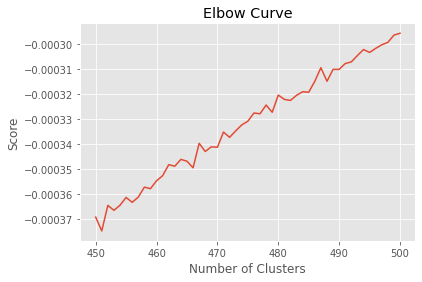

In [57]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [58]:
kmeans = KMeans(n_clusters = 500, init ='k-means++')
kmeans.fit(df_cluster[df_cluster.columns[1:3]]) # Compute k-means clustering. 

df_cluster['cluster_label'] = kmeans.fit_predict(df_cluster[df_cluster.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_cluster[df_cluster.columns[1:3]]) # Labels of each point

df_cluster.head(10)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



address        lat        long  cluster_label
0    6985 calistoga ln, dublin, ca 94568  37.733978 -121.872736            205
1       4273 trolan ln, dublin, ca 94568  37.737748 -121.876525            205
2   7370 yountville st, dublin, ca 94568  37.737013 -121.877507            205
3   4075 st helena way, dublin, ca 94568  37.736513 -121.873423            205
4      10885 mcpeak ln, dublin, ca 94568  37.699680 -121.956865            274
5     7272 carneros ln, dublin, ca 94568  37.736948 -121.874507            205
6      7256 kenwood rd, dublin, ca 94568  37.736172 -121.875915            205
7  4025 chalk hill way, dublin, ca 94568  37.737183 -121.871938            205
8     7278 carneros ln, dublin, ca 94568  37.736995 -121.874468            205
9   4036 st helena way, dublin, ca 94568  37.736116 -121.872661            205

In [59]:
# Now, let's confirm clusters count:
df_cluster.nunique()

address          6002
lat              5865
long             5267
cluster_label     500
dtype: int64

In [60]:
# Let's plot the entire dataset based on Cluster:
px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_cluster, lat='lat', 
                        lon='long', color="cluster_label",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'House Locations based on Clusters')

fig.show()

In [61]:
# Let's plot a specific cluster so let's choose cluster # 205:
px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_cluster[df_cluster['cluster_label'] == 205], lat='lat', 
                        lon='long', color="cluster_label",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'House Locations in Cluster #205')

fig.show()

As shown above, we can see that choosing cluster # 500 is the best, for example, Cluster# 168 is a good example because this is a new community in Dublin, CA called Wallis Ranch.

In [62]:
df_cluster.head(10)

address        lat        long  cluster_label
0    6985 calistoga ln, dublin, ca 94568  37.733978 -121.872736            205
1       4273 trolan ln, dublin, ca 94568  37.737748 -121.876525            205
2   7370 yountville st, dublin, ca 94568  37.737013 -121.877507            205
3   4075 st helena way, dublin, ca 94568  37.736513 -121.873423            205
4      10885 mcpeak ln, dublin, ca 94568  37.699680 -121.956865            274
5     7272 carneros ln, dublin, ca 94568  37.736948 -121.874507            205
6      7256 kenwood rd, dublin, ca 94568  37.736172 -121.875915            205
7  4025 chalk hill way, dublin, ca 94568  37.737183 -121.871938            205
8     7278 carneros ln, dublin, ca 94568  37.736995 -121.874468            205
9   4036 st helena way, dublin, ca 94568  37.736116 -121.872661            205

In [63]:
# let's drop 'lat' and 'long':
cluster = df_cluster[['address', 'cluster_label']]
cluster.head()

address  cluster_label
0   6985 calistoga ln, dublin, ca 94568            205
1      4273 trolan ln, dublin, ca 94568            205
2  7370 yountville st, dublin, ca 94568            205
3  4075 st helena way, dublin, ca 94568            205
4     10885 mcpeak ln, dublin, ca 94568            274

In [64]:
# Finally, let's merge cluster and df_final dataframes ON 'address':
df_final = pd.merge(df_final, cluster, how='left', on='address')
df_final.head()

address              property_type  zipcode  \
0   6985 calistoga ln, dublin, ca 94568                Condo/Co-op    94568   
1      4273 trolan ln, dublin, ca 94568  Single Family Residential    94568   
2  7370 yountville st, dublin, ca 94568  Single Family Residential    94568   
3  4075 st helena way, dublin, ca 94568  Single Family Residential    94568   
4     10885 mcpeak ln, dublin, ca 94568                  Townhouse    94568   

     price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  \
0   905000     3      4  1994         0              80             454   
1  1250000     4      4  3083      3058             143             405   
2  1290000     4      4  3180      4477             123             406   
3  1105000     4      2  2069      2851              21             534   
4   725000     3      2  1387      5806              51             523   

   hoa_month        lat        long  property_age  school_rating  \
0      388.0  37.733978 -121.872736             3              8   
1      232.0  37.737748 -121.876525             4              8   
2      232.0  37.737013 -121.877507             3              8   
3      237.0  37.736513 -121.873423             3              8   
4      325.0  37.699680 -121.956865            24              8   

   school_count  bart_count  median_income  hotness_score  supply_score  \
0            11           1         119637          83.72         94.25   
1            11           1         119637          83.72         94.25   
2            11           1         119637          83.72         94.25   
3            11           1         119637          83.72         94.25   
4            11           1         119637          83.72         94.25   

   demand_score  malls_count  university_count  barts  malls  universities  \
0         73.19            0                 0      1      0             0   
1         73.19            0                 0      1      0             0   
2         73.19            0                 0      1      0             0   
3         73.19            0                 0      1      0             0   
4         73.19            0                 0      1      0             0   

   bedBath  AvgRoomSize  cluster_label  
0       12      284.857            205  
1       16      385.375            205  
2       16      397.500            205  
3        8      344.833            205  
4        6      277.400            274

**Now let's create a new feature based on cluster label called 'median_price_sqft_cluster'. so we'll group by houses per cluster using 'price_per_sqft'.**

In [65]:
median_price_sqft_cluster = df_final.groupby('cluster_label')['price_per_sqft'].median()
df_sqf = pd.DataFrame(median_price_sqft_cluster)
df_sqf = df_sqf.reset_index()
df_sqf

cluster_label  price_per_sqft
0                0           412.0
1                1           506.0
2                2           524.0
3                3           798.0
4                4           317.0
..             ...             ...
495            495           732.5
496            496           680.0
497            497           592.5
498            498           532.5
499            499           328.5

[500 rows x 2 columns]

In [66]:
# let's rename 'price_per_sqft' to 'median_price_sqft_cluster':
df_sqf.rename(columns = {list(df_sqf)[1]: 'median_price_sqft_cluster'}, inplace = True)
df_sqf.head()

cluster_label  median_price_sqft_cluster
0              0                      412.0
1              1                      506.0
2              2                      524.0
3              3                      798.0
4              4                      317.0

In [67]:
# Ok, now let's merge df_final & df_sqf On 'cluster_label':
df_final = pd.merge(df_final, df_sqf, how='left', on='cluster_label')
df_final.head()

address              property_type  zipcode  \
0   6985 calistoga ln, dublin, ca 94568                Condo/Co-op    94568   
1      4273 trolan ln, dublin, ca 94568  Single Family Residential    94568   
2  7370 yountville st, dublin, ca 94568  Single Family Residential    94568   
3  4075 st helena way, dublin, ca 94568  Single Family Residential    94568   
4     10885 mcpeak ln, dublin, ca 94568                  Townhouse    94568   

     price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  \
0   905000     3      4  1994         0              80             454   
1  1250000     4      4  3083      3058             143             405   
2  1290000     4      4  3180      4477             123             406   
3  1105000     4      2  2069      2851              21             534   
4   725000     3      2  1387      5806              51             523   

   hoa_month        lat        long  property_age  school_rating  \
0      388.0  37.733978 -121.872736             3              8   
1      232.0  37.737748 -121.876525             4              8   
2      232.0  37.737013 -121.877507             3              8   
3      237.0  37.736513 -121.873423             3              8   
4      325.0  37.699680 -121.956865            24              8   

   school_count  bart_count  median_income  hotness_score  supply_score  \
0            11           1         119637          83.72         94.25   
1            11           1         119637          83.72         94.25   
2            11           1         119637          83.72         94.25   
3            11           1         119637          83.72         94.25   
4            11           1         119637          83.72         94.25   

   demand_score  malls_count  university_count  barts  malls  universities  \
0         73.19            0                 0      1      0             0   
1         73.19            0                 0      1      0             0   
2         73.19            0                 0      1      0             0   
3         73.19            0                 0      1      0             0   
4         73.19            0                 0      1      0             0   

   bedBath  AvgRoomSize  cluster_label  median_price_sqft_cluster  
0       12      284.857            205                      441.5  
1       16      385.375            205                      441.5  
2       16      397.500            205                      441.5  
3        8      344.833            205                      441.5  
4        6      277.400            274                      551.0

### 4.3 Calculating Distance between houses and Schools Using Haversine formula<a id='4.3_Calculating_Distance_between_houses_and_Schools_Using_Haversine_formula'></a>

**The Haversine formula** is perhaps the first equation to consider when understanding how to calculate distances on a sphere. The word "Haversine" comes from the function:

$haversine(θ) = sin²(θ/2)$

The following equation where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) is how we translate the above formula to include latitude and longitude coordinates. Note that angles need to be in radians to pass to trig functions:

$a = sin²(φB — φA/2) + cos φA * cos φB * sin²(λB — λA/2)$

$c = 2 * atan2( √a, √(1−a) )$

$d = R ⋅ c$

So now let's load the processed data:

In [ ]:
# Check Current Directory:
os.getcwd()

In [69]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

In [72]:
#Let's load the data:
school = pd.read_csv('final.csv')

In [73]:
school.head()

address  gsRating  distance_miles
0             1 brisdale pl, antioch, ca 94509  2.000000        1.340000
1      1 chorley walk, pleasant hill, ca 94523  6.272727        1.457273
2     1 e circle ranch pl, san ramon, ca 94583  7.875000        1.703125
3               1 hardy ct, danville, ca 94526  9.333333        1.621667
4  1 heritage oaks rd, pleasant hill, ca 94523  6.384615        1.934615

In [74]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6002 entries, 0 to 6001
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         6002 non-null   object 
 1   gsRating        6002 non-null   float64
 2   distance_miles  6002 non-null   float64
dtypes: float64(2), object(1)
memory usage: 140.8+ KB


In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6002 entries, 0 to 6001
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   address                    6002 non-null   object 
 1   property_type              6002 non-null   object 
 2   zipcode                    6002 non-null   int64  
 3   price                      6002 non-null   int64  
 4   beds                       6002 non-null   int64  
 5   baths                      6002 non-null   int64  
 6   sqft                       6002 non-null   int64  
 7   lot_size                   6002 non-null   int64  
 8   days_on_market             6002 non-null   int64  
 9   price_per_sqft             6002 non-null   int64  
 10  hoa_month                  6002 non-null   float64
 11  lat                        6002 non-null   float64
 12  long                       6002 non-null   float64
 13  property_age               6002 non-null   int64

In [76]:
# Finally, let's merge df_final and school on 'address':
df_final = pd.merge(df_final, school, how='left', on='address')
df_final.head()

address              property_type  zipcode  \
0   6985 calistoga ln, dublin, ca 94568                Condo/Co-op    94568   
1      4273 trolan ln, dublin, ca 94568  Single Family Residential    94568   
2  7370 yountville st, dublin, ca 94568  Single Family Residential    94568   
3  4075 st helena way, dublin, ca 94568  Single Family Residential    94568   
4     10885 mcpeak ln, dublin, ca 94568                  Townhouse    94568   

     price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  \
0   905000     3      4  1994         0              80             454   
1  1250000     4      4  3083      3058             143             405   
2  1290000     4      4  3180      4477             123             406   
3  1105000     4      2  2069      2851              21             534   
4   725000     3      2  1387      5806              51             523   

   hoa_month        lat        long  property_age  school_rating  \
0      388.0  37.733978 -121.872736             3              8   
1      232.0  37.737748 -121.876525             4              8   
2      232.0  37.737013 -121.877507             3              8   
3      237.0  37.736513 -121.873423             3              8   
4      325.0  37.699680 -121.956865            24              8   

   school_count  bart_count  median_income  hotness_score  supply_score  \
0            11           1         119637          83.72         94.25   
1            11           1         119637          83.72         94.25   
2            11           1         119637          83.72         94.25   
3            11           1         119637          83.72         94.25   
4            11           1         119637          83.72         94.25   

   demand_score  malls_count  university_count  barts  malls  universities  \
0         73.19            0                 0      1      0             0   
1         73.19            0                 0      1      0             0   
2         73.19            0                 0      1      0             0   
3         73.19            0                 0      1      0             0   
4         73.19            0                 0      1      0             0   

   bedBath  AvgRoomSize  cluster_label  median_price_sqft_cluster  gsRating  \
0       12      284.857            205                      441.5  8.714286   
1       16      385.375            205                      441.5  8.714286   
2       16      397.500            205                      441.5  8.714286   
3        8      344.833            205                      441.5  8.909091   
4        6      277.400            274                      551.0  7.333333   

   distance_miles  
0        2.267857  
1        2.250000  
2        2.227857  
3        2.097273  
4        2.338333

### 4.4 Dropping and encoding Features<a id='4.4_Dropping_and_encoding_Features'></a>

In [77]:
# let's check df_final columns:
df_final.columns

Index(['address', 'property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count', 'bart_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'malls_count', 'university_count', 'barts', 'malls', 'universities',
       'bedBath', 'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster',
       'gsRating', 'distance_miles'],
      dtype='object')

1. Let's drop 'malls_count', 'bart_count' and we'll be using : 'address', 'lat' and 'long' to cluter houses to the closest possible.
2. After we drop the above columns, that means we still have one column with 'object' datatype which is 'property_type', so let's encode it manually:
 * Single Family Residential == 0
 * Condo/Co-op == 1
 * Townhouse == 2
   

In [78]:
df_final.head()

address              property_type  zipcode  \
0   6985 calistoga ln, dublin, ca 94568                Condo/Co-op    94568   
1      4273 trolan ln, dublin, ca 94568  Single Family Residential    94568   
2  7370 yountville st, dublin, ca 94568  Single Family Residential    94568   
3  4075 st helena way, dublin, ca 94568  Single Family Residential    94568   
4     10885 mcpeak ln, dublin, ca 94568                  Townhouse    94568   

     price  beds  baths  sqft  lot_size  days_on_market  price_per_sqft  \
0   905000     3      4  1994         0              80             454   
1  1250000     4      4  3083      3058             143             405   
2  1290000     4      4  3180      4477             123             406   
3  1105000     4      2  2069      2851              21             534   
4   725000     3      2  1387      5806              51             523   

   hoa_month        lat        long  property_age  school_rating  \
0      388.0  37.733978 -121.872736             3              8   
1      232.0  37.737748 -121.876525             4              8   
2      232.0  37.737013 -121.877507             3              8   
3      237.0  37.736513 -121.873423             3              8   
4      325.0  37.699680 -121.956865            24              8   

   school_count  bart_count  median_income  hotness_score  supply_score  \
0            11           1         119637          83.72         94.25   
1            11           1         119637          83.72         94.25   
2            11           1         119637          83.72         94.25   
3            11           1         119637          83.72         94.25   
4            11           1         119637          83.72         94.25   

   demand_score  malls_count  university_count  barts  malls  universities  \
0         73.19            0                 0      1      0             0   
1         73.19            0                 0      1      0             0   
2         73.19            0                 0      1      0             0   
3         73.19            0                 0      1      0             0   
4         73.19            0                 0      1      0             0   

   bedBath  AvgRoomSize  cluster_label  median_price_sqft_cluster  gsRating  \
0       12      284.857            205                      441.5  8.714286   
1       16      385.375            205                      441.5  8.714286   
2       16      397.500            205                      441.5  8.714286   
3        8      344.833            205                      441.5  8.909091   
4        6      277.400            274                      551.0  7.333333   

   distance_miles  
0        2.267857  
1        2.250000  
2        2.227857  
3        2.097273  
4        2.338333

In [79]:
# let's check property_type distribution:
df_final.property_type.value_counts()

Single Family Residential    4482
Condo/Co-op                   893
Townhouse                     627
Name: property_type, dtype: int64

In [80]:
# let's encode property_type manually:
df_final.loc[df_final['property_type'] == 'Single Family Residential', 'property_type'] = 0
df_final.loc[df_final['property_type'] == 'Condo/Co-op', 'property_type'] = 1
df_final.loc[df_final['property_type'] == 'Townhouse', 'property_type'] = 2

<AxesSubplot:ylabel='Frequency'>

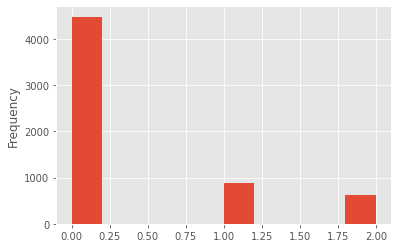

In [81]:
# let's confirm property_type encoding:
df_final.property_type.plot(kind='hist')

In [82]:
# let's check df_final columns:
df_final.columns

Index(['address', 'property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count', 'bart_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'malls_count', 'university_count', 'barts', 'malls', 'universities',
       'bedBath', 'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster',
       'gsRating', 'distance_miles'],
      dtype='object')

In [87]:
# let's drop  'address', 'malls_count', 'bart_count' and rename our DataFrame: df_final_v1
df_final_v1 = df_final[['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
                       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
                       'long', 'property_age', 'school_rating', 'school_count', 
                       'median_income', 'hotness_score', 'supply_score', 'demand_score',
                       'university_count', 'barts', 'malls', 'universities',
                       'bedBath', 'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster',
                       'gsRating', 'distance_miles']]

In [88]:
#let's check correlation with respect to price after dropping and adding the new features:
df_final_v1.corr()['price']

zipcode                      0.195194
beds                         0.536172
baths                        0.509045
sqft                         0.681056
price                        1.000000
lot_size                     0.474954
days_on_market              -0.080730
price_per_sqft               0.482850
hoa_month                   -0.251720
lat                         -0.430166
long                         0.104199
property_age                -0.127317
school_rating                0.562773
school_count                -0.262040
median_income                0.588687
hotness_score               -0.231455
supply_score                -0.115405
demand_score                -0.217323
university_count            -0.002533
barts                       -0.257318
malls                       -0.035761
universities                 0.068721
bedBath                      0.561117
AvgRoomSize                  0.460586
cluster_label                0.023367
median_price_sqft_cluster    0.519988
gsRating    

In [89]:
#let's chech df_final_v1 structure:
df_final_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6002 entries, 0 to 6001
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_type              6002 non-null   object 
 1   zipcode                    6002 non-null   int64  
 2   beds                       6002 non-null   int64  
 3   baths                      6002 non-null   int64  
 4   sqft                       6002 non-null   int64  
 5   price                      6002 non-null   int64  
 6   lot_size                   6002 non-null   int64  
 7   days_on_market             6002 non-null   int64  
 8   price_per_sqft             6002 non-null   int64  
 9   hoa_month                  6002 non-null   float64
 10  lat                        6002 non-null   float64
 11  long                       6002 non-null   float64
 12  property_age               6002 non-null   int64  
 13  school_rating              6002 non-null   int64

In [90]:
#Finally, let's change property_type from object to int64 after we encoded the values:
df_final_v1['property_type'] = df_final_v1['property_type'].astype('int64')

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 4.5 Final DataFrame Summary<a id='4.5_Final_DataFrame_Summary'></a>

In [91]:
# Alright, Finally let's have a look at our unique values, data types, missing values per variables:
summary = pd.concat([df_final_v1.nunique(), df_final_v1.dtypes, df_final_v1.isnull().sum(), 100*df_final_v1.isnull().mean()], axis=1)
summary.columns =['unique_count', 'dtypes', 'na_count', 'na_%']
summary.sort_values(by='unique_count', ascending=False)

unique_count   dtypes  na_count  na_%
lat                                5865  float64         0   0.0
long                               5267  float64         0   0.0
distance_miles                     4737  float64         0   0.0
AvgRoomSize                        2799  float64         0   0.0
lot_size                           2654    int64         0   0.0
sqft                               2179    int64         0   0.0
price                              1439    int64         0   0.0
price_per_sqft                      827    int64         0   0.0
gsRating                            633  float64         0   0.0
cluster_label                       500    int32         0   0.0
hoa_month                           492  float64         0   0.0
median_price_sqft_cluster           362  float64         0   0.0
days_on_market                      310    int64         0   0.0
property_age                        121    int64         0   0.0
zipcode                              31    int64         0   0.0
median_income                        31    int64         0   0.0
hotness_score                        31  float64         0   0.0
supply_score                         31  float64         0   0.0
demand_score                         31  float64         0   0.0
bedBath                              20    int64         0   0.0
school_count                         12    int64         0   0.0
school_rating                         9    int64         0   0.0
beds                                  8    int64         0   0.0
baths                                 7    int64         0   0.0
university_count                      3    int64         0   0.0
property_type                         3    int64         0   0.0
malls                                 2    int64         0   0.0
universities                          2    int64         0   0.0
barts                                 2    int64         0   0.0

Alright, as shown above, all our features are numerical, datatypes are correct and no missing data

Text(0.5, 1.0, 'House Sales - Final Dataframe (No outliers)')

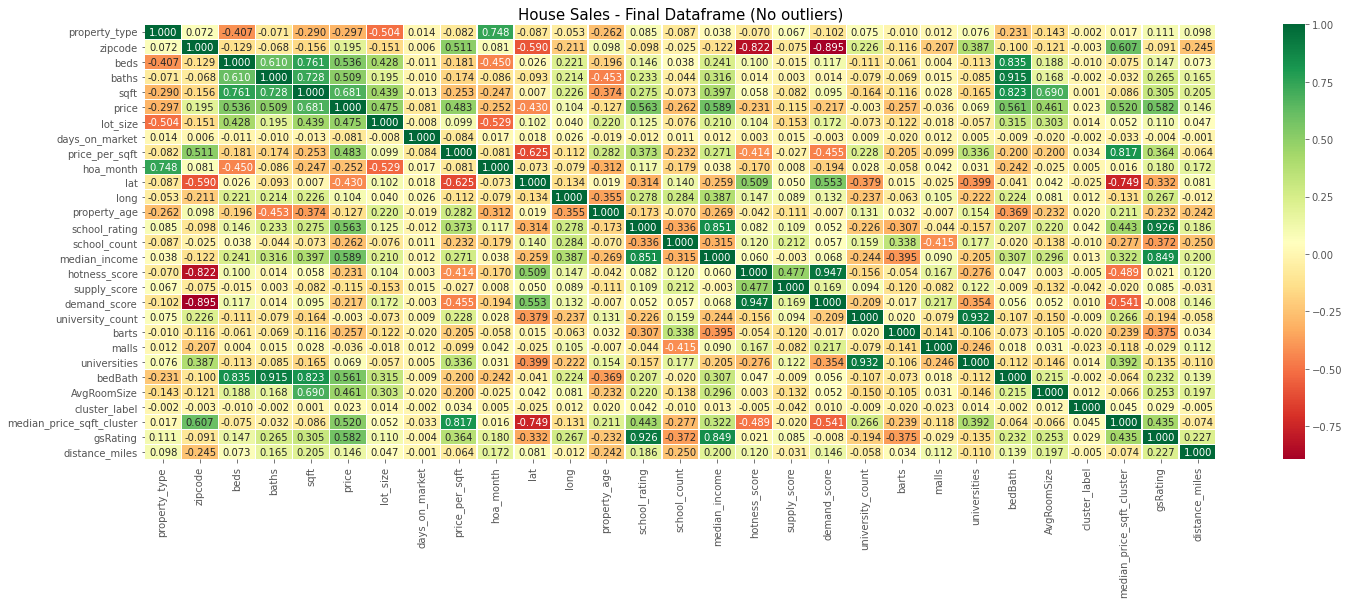

In [115]:
# Make a heatmap of the data 
plt.figure(figsize=(24,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(df_final_v1.corr(), linewidths=.4, annot=True, fmt=".3f", cmap='RdYlGn')
plt.title('House Sales - Final Dataframe (No outliers)', fontsize=15)

### 4.6 Final Visualization of our Target Variable 'price'<a id='4.6_Final_Visualization_of_our_Target_Variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



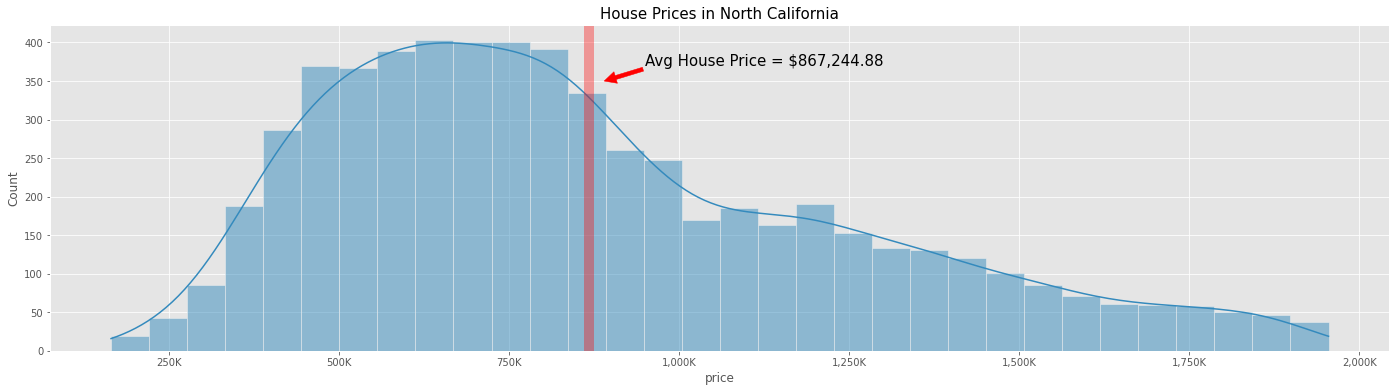

In [93]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df_final_v1['price'], kde=True)
ax.axvline(df_final_v1['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

In [94]:
df_final_v1.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

## 5. Features Selection: Define/Select Features<a id='5_Features_Selection:_Define/Select_Features'></a>


In [95]:
# let's check our final df columns:
df_final_v1.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [102]:
# Let's define/select our features: We'll be removing 'price_per_sqft':
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'hoa_month', 'lat', 'gsRating',
       'long', 'property_age', 'school_count', 'distance_miles',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster']

# And, Now let's define X and y:
X = df_final_v1[features]
y = df_final_v1.price

## 6. Train/Test Split<a id='6_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [103]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 7. Scaling and Transformation: Standardization<a id='7_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [104]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 8. Modeling<a id='8_Modeling'></a>

### 8.1 Dummy Regression<a id='8.1_Dummy_Regression'></a>

DummyRegressor is a regressor that makes predictions using simple rules.

This regressor is useful as a simple baseline to compare with other (real) regressors.

The main role of strategy is to predict target values without any influence of the training data. There are namely four types of strategies that are used by the Dummy Regressor:-

 1. Mean: This is the default strategy used by the Dummy Regressor. It always predicts the mean of the training target values.
 2. Median: This is used to predict the median of the training target values.
 3. Quantile: It is used to predict a particular quantile of training target values provided the quantile parameter is used along with it.
 4. Constant: This is generally used to predict a specific custom value that is provided and the constant parameter must be mentioned.



#### 8.1.1 Fitting Dummy Regression<a id='8.1.1_Fitting_Dummy_Regression'></a>


In [105]:
# Import LinearRegression
from sklearn.dummy import DummyRegressor

# Create the regressor: dummy_reg
dummy_reg = DummyRegressor(strategy="mean")

# Fit the regressor to the training data
dummy_reg.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.2f}".format(dummy_reg.score(X_test, y_test)))


# Predict on the test data: y_pred_dummy
y_pred_dummy = dummy_reg.predict(X_test)

R-Squared coefficient : -0.00


As can be seen from the above result. The expected Dummy Regressor always predict the R-Squared as 0 , since it is always predicting a constant without having an insight of the output. ( In general, best rR-Squared is 1 and Constant R-Squared is 0).

#### 8.1.2 Dummy Regression Model Evaluation<a id='8.1.2_Dummy_Regression_Model_Evaluation'></a>

In [106]:
from sklearn import metrics

print("********Dummy Regression Model Evaluation********")
print("--------------------------------------------------")
print("Dummy Regression - R^2 Score: {:.2f}".format(metrics.r2_score(y_test, y_pred_dummy) * 100), '%')
print("-------------------------------------------------------------")
print("Dummy Regression - Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_dummy))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("--------------------------------------------------")
print("Dummy Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_dummy)))
print("--------------------------------------------------")
print("Dummy Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_dummy)))
print("--------------------------------------------------")
print("Dummy Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dummy))))
print("--------------------------------------------------")
print("Dummy Regression - Variance Score:{:.2f}".format( metrics.explained_variance_score(y_test, y_pred_dummy) * 100), '%')
print("--------------------------------------------------")

********Dummy Regression Model Evaluation********
--------------------------------------------------
Dummy Regression - R^2 Score: -0.00 %
-------------------------------------------------------------
Dummy Regression - Adjusted R^2 Score: -1.7650 %
--------------------------------------------------
Dummy Regression - MAE: 301148.2119
--------------------------------------------------
Dummy Regression - MSE:141606549576.3543
--------------------------------------------------
Dummy Regression - RMSE:376306.4570
--------------------------------------------------
Dummy Regression - Variance Score:-0.00 %
--------------------------------------------------


As we can see, the high value of **root mean squared error (RMSE) is 376,306.4570**, which is slightly larger than 40% of the mean value of the Sales Price i.e.  $867,244.88.

Now, let's compare this poor result with a Linear Regression.

### 8.2 Linear Regression<a id='8.2_Linear_Regression'></a>

Making a Linear Regression model:  Sklearn has a LinearRegression() function built into the linear_model module. We'll be using that to make our first regression model.

#### 8.2.1 Fitting Linear Regression<a id='8.2.1_Fitting_Linear_Regression'></a>

In [107]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.2f}".format(reg.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred
y_pred = reg.predict(X_test)




R-Squared coefficient : 87.32 %


The above score is called **R-Squared coefficient**, or the **"coefficient of determination"**. It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. **At the moment, our Linear regression model explains 87.15% of the variation from the mean.**

#### 8.2.2 Linear Regression: intercept & Coefficients<a id='8.2.2_Linear_Regression:_intercept_&_Coefficients'></a>

In [108]:
print("Linear Regression - intercept: {:.3f}".format(reg.intercept_))
print("\n")
print("***Linear Regression - Coefficients***")
print(pd.DataFrame(reg.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

Linear Regression - intercept: 867558.259


***Linear Regression - Coefficients***
                                  coef
demand_score               35128603.13
supply_score               12685815.15
median_price_sqft_cluster    115916.76
sqft                         110176.09
baths                         99596.10
gsRating                      90998.06
beds                          75464.26
lot_size                      51353.59
AvgRoomSize                   44764.82
universities                  35990.46
median_income                 29032.65
zipcode                       26497.48
malls                         19055.94
distance_miles                11898.34
school_count                   7898.90
barts                          7435.62
cluster_label                  -404.85
property_age                  -9390.16
days_on_market               -19254.43
university_count             -22605.13
hoa_month                    -24723.40
lat                          -26182.60
long                

Linear Regression: intercept & Coefficients Summary:
 * From above Linear Regression coefficients, we can see that **Regularization** is needed: As we know Linear regression minmizes a loss function by choosing  a coefficient for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting easily. so, it is common practice to alter the loss function so that it penalizes for large coefficients using **Regularization**. So next, we'll be using both Ridge Regression and Lasso Regression.
 * Also, we can see that there're few features showing very low Coefficients i.e.  'malls', 'university_count', so if we drop them definteley we'll improve our predictions.




#### 8.2.3 Linear Regression: Residuals Visualization<a id='8.2.3_Linear_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

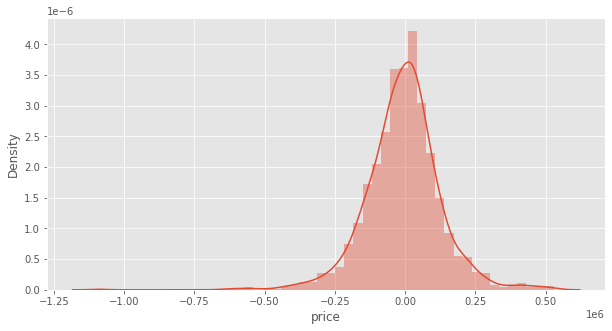

In [109]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

#### 8.2.4 Linear Regression Model Evaluation<a id='8.2.4_Linear_Regression_Model_Evaluation'></a>

Let’s compare actual output and predicted value to measure how far our predictions are from the real house prices.

In [110]:
from sklearn import metrics

print("********Linear Regression Model Evaluation********")
print("--------------------------------------------------")
print("Linear Regression - R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred) * 100), '%')
print("-------------------------------------------------------------")
print("Linear Regression - Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("--------------------------------------------------")
print("Linear Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("--------------------------------------------------")
print("Linear Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("--------------------------------------------------")
print("Linear Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("--------------------------------------------------")
print("Linear Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred) * 100), '%')
print("--------------------------------------------------")

********Linear Regression Model Evaluation********
--------------------------------------------------
Linear Regression - R^2 Score: 87.3165 %
-------------------------------------------------------------
Linear Regression - Adjusted R^2 Score: 87.0928 %
--------------------------------------------------
Linear Regression - MAE: 96346.3208
--------------------------------------------------
Linear Regression - MSE:17960493077.7954
--------------------------------------------------
Linear Regression - RMSE:134016.7642
--------------------------------------------------
Linear Regression - Variance Score:87.3498 %
--------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 134,881.244**, which is slightly larger than 15% of the mean value of the Sales Price i.e. $867,244.88. also, we have **acceptable variance score at 87.1799 %. This means that our Linear Regression is way better than Dummy Regression**

Text(0, 0.5, 'Prediction')

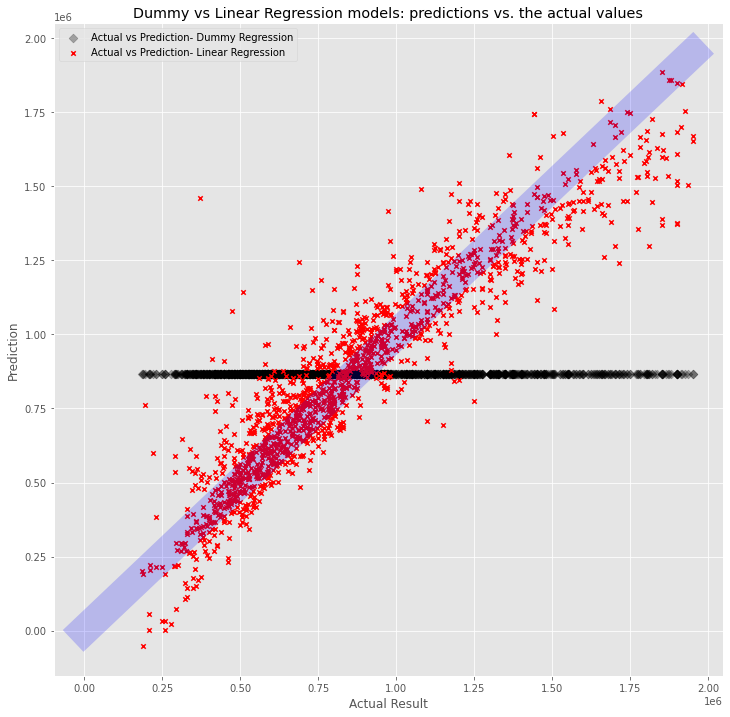

In [111]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(12,12))
plt.scatter(y_test,y_pred_dummy, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction- Dummy Regression')
plt.scatter(y_test,y_pred, color='red', marker='x', s=20,label='Actual vs Prediction- Linear Regression')
plt.title('Dummy vs Linear Regression models: predictions vs. the actual values')

# Add a line for perfect correlation
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')


In [112]:
final_linear = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_linear': y_pred.round(3)})
final_linear.head(30).sort_values(by='SalePrice_Actual', ascending=False)


SalePrice_Actual  SalePrice_Predicted_linear
437            1767539                 1482053.739
253            1600000                 1415803.669
2625           1566000                 1417492.893
2170           1485000                 1471616.593
1913           1463000                 1212627.914
3237           1370000                 1390610.291
1804           1320000                 1002273.397
4358           1170000                 1000466.650
1343           1005000                  804721.591
406             990000                 1050563.196
154             920000                  993411.623
778             910000                  912512.625
2734            890000                 1036686.632
1268            840000                  846269.540
3657            830000                  797022.575
4592            763000                  811062.382
4762            750000                  704524.376
3558            750000                  825147.452
1250            730000                 1149817.181
3924            699000                  763388.369
1597            692000                  588416.820
3009            640000                  740398.470
3836            635000                  622015.603
1001            600000                  566439.511
841             572000                  591886.722
4972            529000                  484842.829
5186            525000                  567948.718
5324            505000                  365969.867
2112            475000                 1078302.528
696             440000                  626623.701

### 8.2 Models next step:<a id='8.2_Models_next_step'></a>

Now, after building our base Model: Linear regression, let's see if we can further improve our prediction using below algorithms:

 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Stacking
 * Neural networks

## 9. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [113]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path/Feature_Engineering/datasets" + "/pre_processing_df_main_two.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))